In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pyforest：懒人导包神器

# 配置参数

In [2]:
%matplotlib inline
# 解决中文乱码的问题
plt.rcParams['font.sans-serif'] = 'SimHei'
# 解决负号无法显示的问题
plt.rcParams['axes.unicode_minus'] = False
# 提高图表质量
%config Inlinebackend.figure_format = 'svg'

# 导入数据

In [3]:
df = pd.read_csv('./data/diamonds.csv')
df.head()

,编号,克拉,切工,颜色,纯净度,深度比例,桌面比例,价格,长,宽,高
0,1,0.23,完美,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,优质,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,很好,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,优质,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,很好,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# 直方图
- 克拉分布

array([[<AxesSubplot:title={'center':'克拉'}>]], dtype=object)

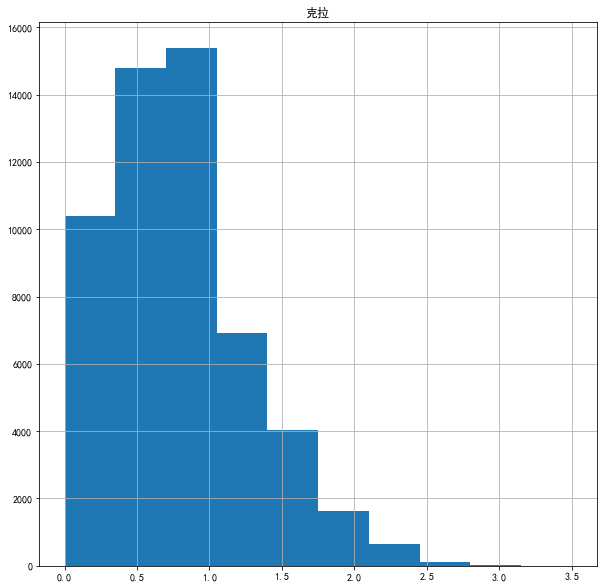

In [8]:
df.hist(column='克拉', bins=10, range=[0, 3.5], figsize=(10, 10))

# 普通箱线图
- 克拉分布

<AxesSubplot:>

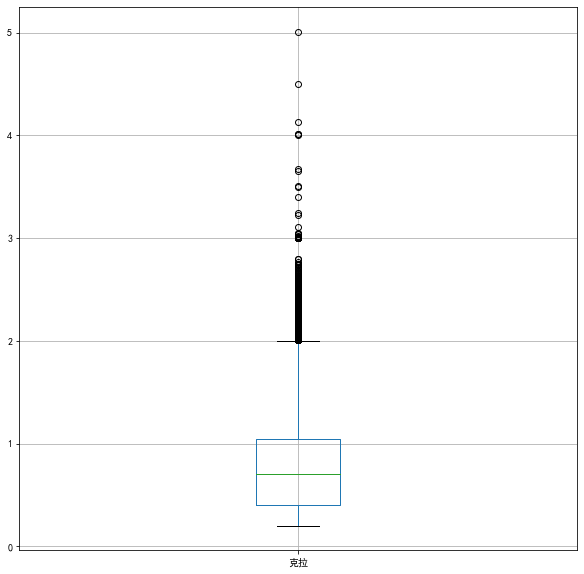

In [10]:
df.boxplot(column='克拉', figsize=(10, 10))

# 分组箱线图
- 各纯净度的价格分布

<AxesSubplot:title={'center':'价格'}, xlabel='纯净度'>

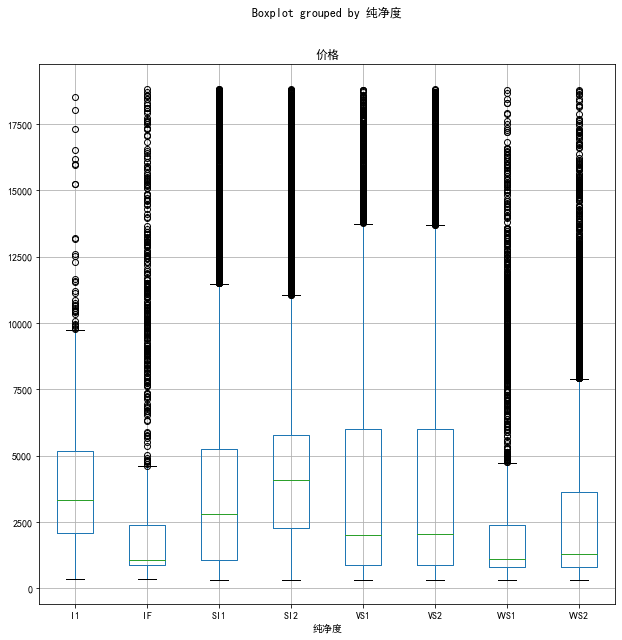

In [11]:
df.boxplot(column='价格', by='纯净度', figsize=(10, 10))

- 各纯净度的克拉分布

<AxesSubplot:title={'center':'克拉'}, xlabel='纯净度'>

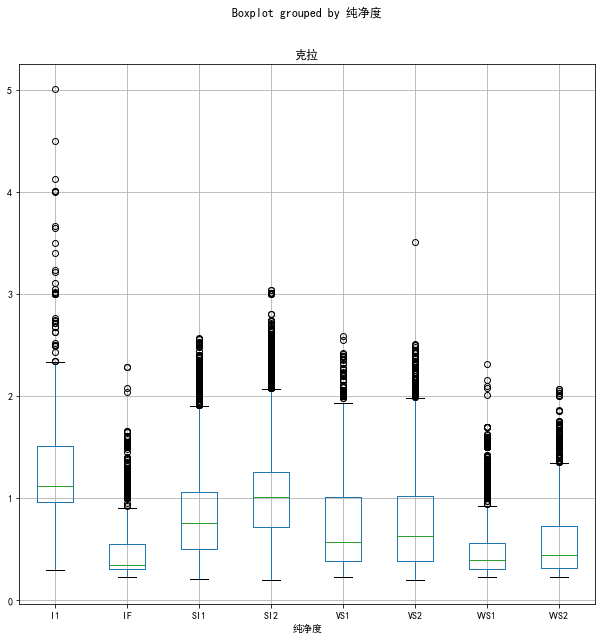

In [12]:
df.boxplot(column='克拉', by='纯净度', figsize=(10, 10))

# 核密度估计图

<AxesSubplot:ylabel='Frequency'>

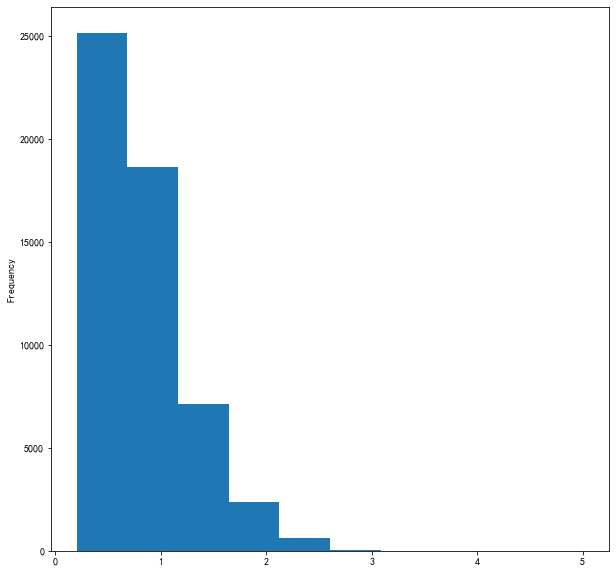

In [14]:
df['克拉'].plot(kind='hist', figsize=(10, 10))

<AxesSubplot:ylabel='Density'>

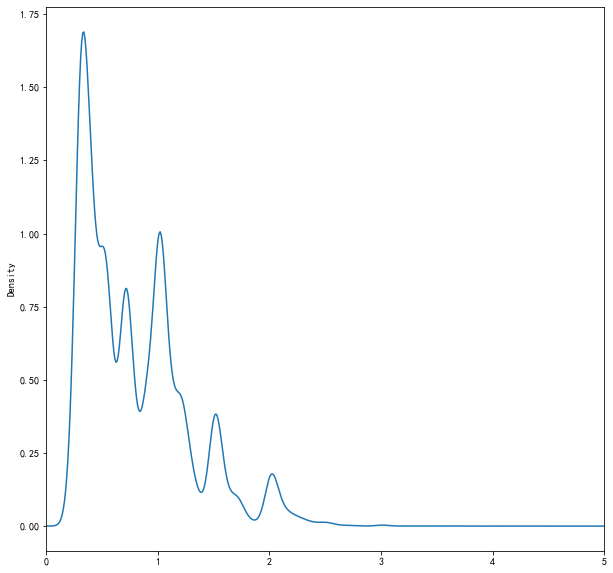

In [15]:
# 类似直方图, 观测数据分布形状
# 直方图:实际值
# 密度图(核密度估计图):估计值
df['克拉'].plot(kind='kde', figsize=(10, 10), xlim=(0, 5))

# 普通柱形图
- 单个维度，各纯净度的频数分布

In [33]:
tb = pd.crosstab(index=df['纯净度'], columns='频数')

<AxesSubplot:xlabel='纯净度'>

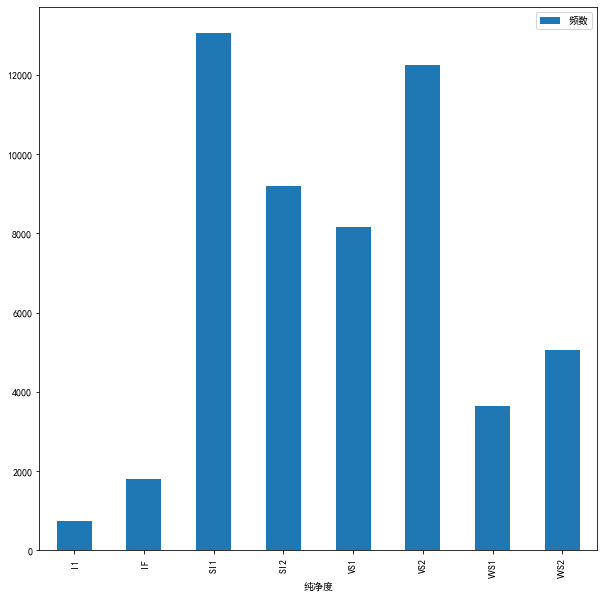

In [34]:
tb.columns.name = None
tb.plot(kind='bar', figsize=(10, 10))

# 簇状柱形图
- 多个维度，各纯净度各颜色的频数分布

<AxesSubplot:xlabel='纯净度'>

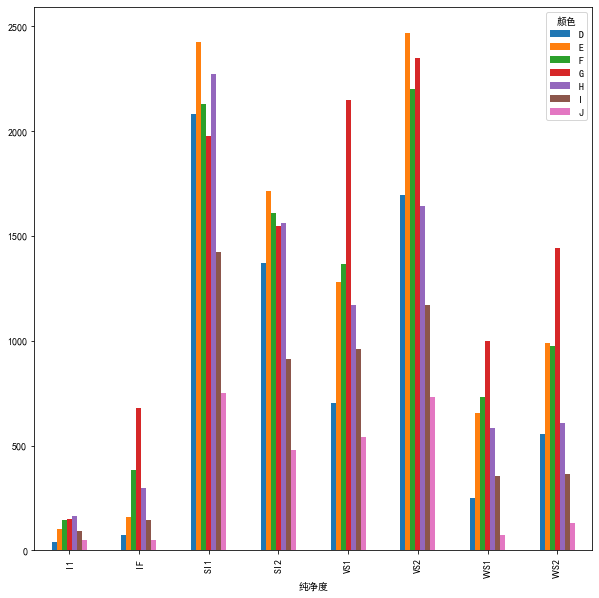

In [37]:
tb = pd.crosstab(index=df['纯净度'], columns=df['颜色'])
tb.plot(kind='bar', figsize=(10, 10))

# 堆积柱形图

<AxesSubplot:xlabel='纯净度'>

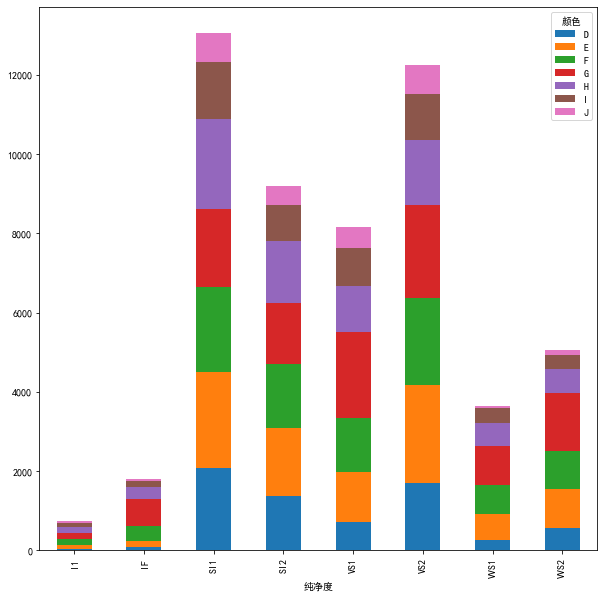

In [39]:
tb = pd.crosstab(index=df['纯净度'], columns=df['颜色'])
tb.plot(kind='bar', figsize=(10, 10), stacked=True)

# 散点图

<AxesSubplot:xlabel='克拉', ylabel='价格'>

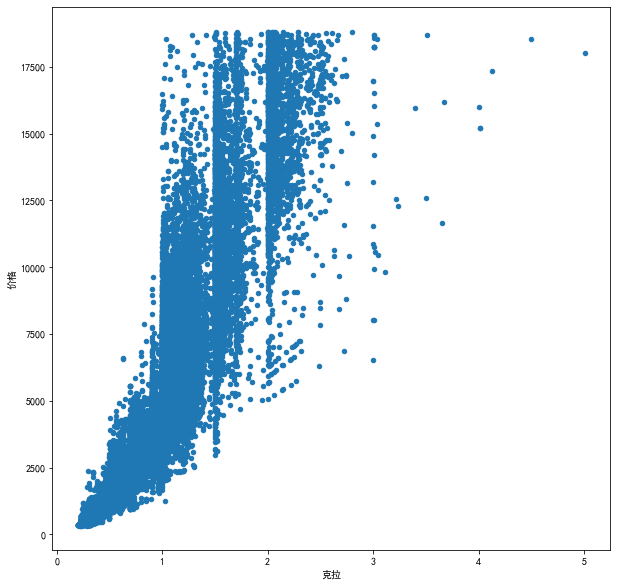

In [40]:
df.plot(kind='scatter', x='克拉', y='价格', figsize=(10, 10))

# 折线图

In [41]:
year = [str(y)+'年' for y in range(2001, 2021)]
sale = np.random.randint(100, 120, 20)
df = pd.DataFrame({'year': year, 'sale': sale})

<AxesSubplot:xlabel='year'>

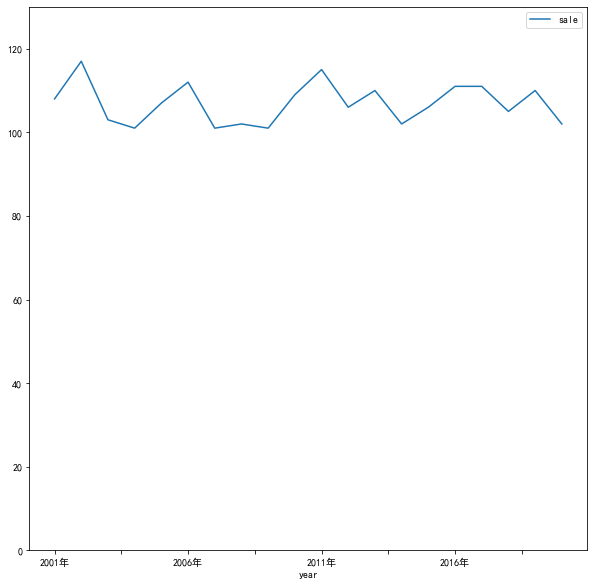

In [45]:
df.plot(x='year', y='sale', figsize=(10, 10), ylim=[0, 130])

# 保存本地

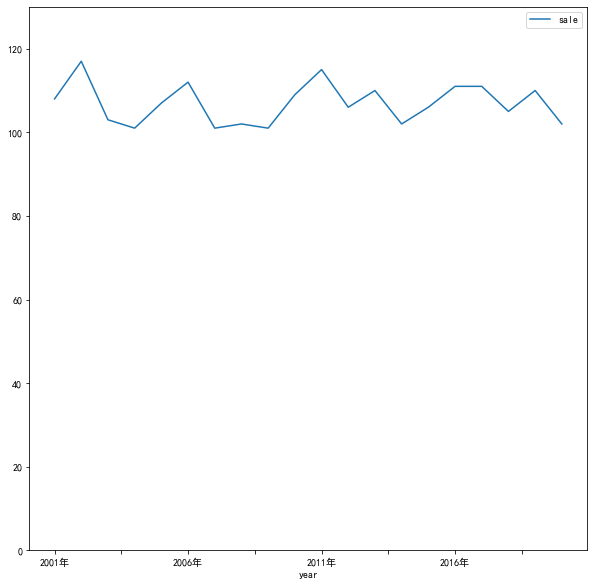

In [46]:
plot = df.plot(x='year', y='sale', figsize=(10, 10), ylim=[0, 130])

In [47]:
plot.get_figure().savefig('折线图.png')